# Visualization of K-Means applied on raw pixels

In [462]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [463]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

In [464]:
# Constants
img_path = r"../../data/img_trial/abc.png"

full_size = 448
patch_size = 14

# K-Means
k = 6
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [465]:
img = cv.imread(img_path)
img = downsample_img(img, full_size, full_size, False)

## Extraction of the patch from the original image

In [466]:
patch = downsample_img(img, patch_size, patch_size, False)

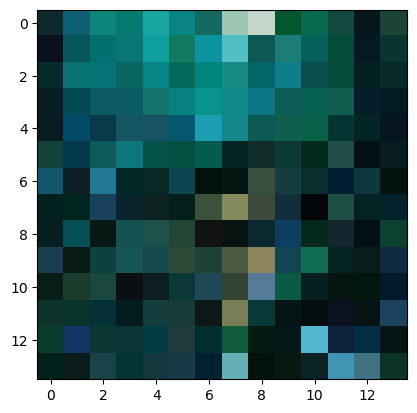

In [467]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

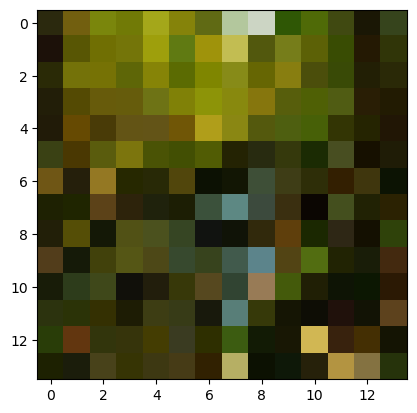

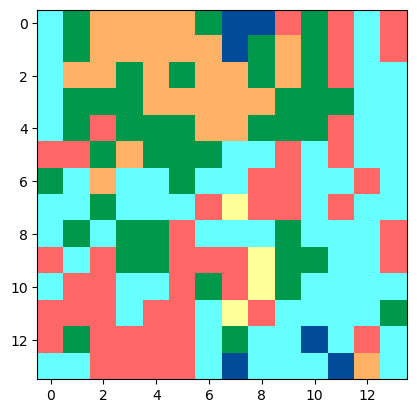

In [468]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Bilinear Interpolation

In [469]:
seg_full = downsample_img(seg_patch, full_size, full_size, False)

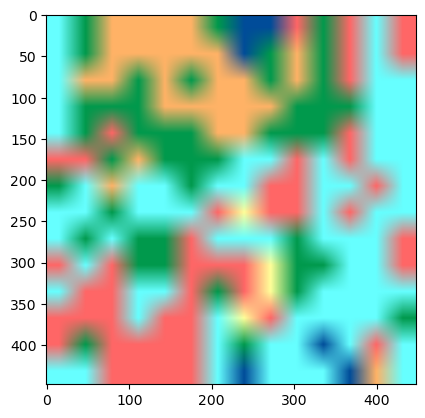

In [470]:
plt.imshow(seg_full)
plt.show()

In [471]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [472]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

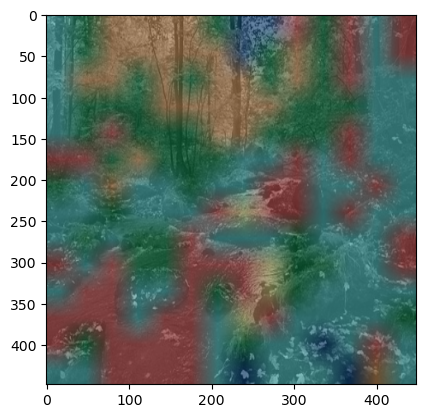

In [473]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [474]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=cv.INTER_NEAREST)

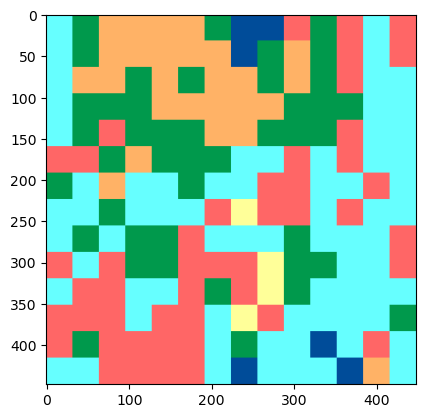

In [475]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [476]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

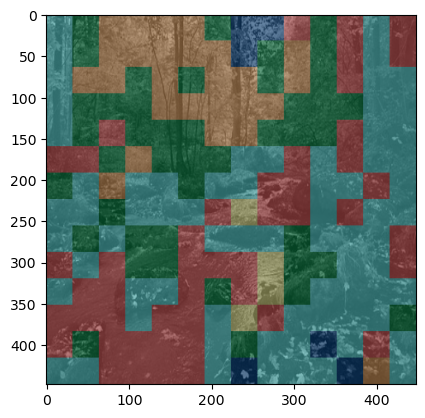

In [477]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()